# Trabajamos con los datos de la plataforma de reseñas Yelp

# Filtramos el dataframe por nuestro cliente, KFC.

In [8]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/YelpEstados_Nombres.csv")

# Filtrar las filas que contengan 'KFC' en la columna 'Negocio'
df_filtrado = df[df['Negocio'].str.contains('KFC')]

# Imprimir el DataFrame resultante
df_filtrado

,review_id,Usuario,business_id,Estrellas_Negocio,Review,Negocio,Direccion_Negocio,Rating_Usuario,Numero_reviews,attributes,Clasificacion Negocio,hours,Ciudad,estado,anio,mes,dia
25777,q8_h32dLOUNKF-9kIGUZ9Q,sRqTe_onMVAOPbfgyL8eOg,XB6FBOSetUsSb-b9-9Shrw,5,kfc has a winner with their zingers! entrance ...,KFC,7103 Seminole Blvd,1.5,11,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-22:0',...",Seminole,Texas,2017,7,7
25778,Mh5VL4swoTebbLMvz1-lBA,VI_NMk3KwjL7016e8RGILg,XB6FBOSetUsSb-b9-9Shrw,1,the worst attitude by manager alexis babb. i a...,KFC,7103 Seminole Blvd,1.5,11,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-22:0',...",Seminole,Texas,2017,12,8
25779,ZxHg6jrSa-TZ7_WZ5LDOng,QZh0qKxIFKI-YT685j5zZA,XB6FBOSetUsSb-b9-9Shrw,1,i was asked specifically not to go to the semi...,KFC,7103 Seminole Blvd,1.5,11,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-22:0',...",Seminole,Texas,2018,3,22
25780,K9QMXlpmfgBoVRXifdh_ng,c_dUQ1Rp6ydzVjkPvHm03w,XB6FBOSetUsSb-b9-9Shrw,1,wow so where do i begin okay so i got a coupon...,KFC,7103 Seminole Blvd,1.5,11,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-22:0',...",Seminole,Texas,2019,8,5
25781,4J2lhTPCKEK2q2CPC_bPVg,LAzKw66HUy746go3QguL_Q,XB6FBOSetUsSb-b9-9Shrw,5,"we were searching for a kfc near our home, as ...",KFC,7103 Seminole Blvd,1.5,11,"{'RestaurantsTakeOut': 'True', 'RestaurantsRes...","Chicken Shop, Chicken Wings, Fast Food, Restau...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-22:0',...",Seminole,Texas,2019,8,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377059,n1ty5S2HQd1RwhIS7GK3Jw,6i0KvJXzs_0jfv-s-KP6tw,S_tu8JCeZsbpgJsqRFaSBg,1,this place is the worst kfc in the world. i ne...,KFC,10575 N Michigan Rd,1.5,39,"{'NoiseLevel': ""u'average'"", 'Alcohol': ""u'non...","Restaurants, Chicken Wings, Fast Food, Chicken...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ...",Carmel,California,2021,1,5
377060,CVSF_sw217LenTLIi-X9FQ,p1H4RuBwbAsI4rZHEOqPPw,S_tu8JCeZsbpgJsqRFaSBg,5,haven't been to a kfc in y e a r s and what a ...,KFC,10575 N Michigan Rd,1.5,39,"{'NoiseLevel': ""u'average'"", 'Alcohol': ""u'non...","Restaurants, Chicken Wings, Fast Food, Chicken...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ...",Carmel,California,2021,6,13
377061,oH0sZe1yHFY_k2L-pEY2Og,TR_6pujq8X7xw6ZapDcEog,S_tu8JCeZsbpgJsqRFaSBg,5,"the food is always hot and fresh, the employee...",KFC,10575 N Michigan Rd,1.5,39,"{'NoiseLevel': ""u'average'"", 'Alcohol': ""u'non...","Restaurants, Chicken Wings, Fast Food, Chicken...","{'Monday': '0:0-0:0', 'Tuesday': '11:0-19:0', ...",Carmel,California,2021,1,8
379741,qCm1FRiLjBOCo_I1AbUXiQ,Qn08B-MKSYv4mqrEfoKxgg,xNWueX3uZjmixQUkY38GzQ,5,this location was so good. the drive thru team...,KFC,1925 Lancaster Ave,3.0,5,"{'WiFi': ""'free'"", 'Caters': 'True', 'Ambience...","Restaurants, Chicken Wings, Fast Food, Chicken...","{'Monday': '0:0-0:0', 'Tuesday': '10:30-0:0', ...",Wilmington,California,2020,8,24


# Sumamos la cantidad de reviews en la columna "Numero_reviews" y los meses y buscamos un conteo total de reviews por mes. 

In [13]:
# Asegurémonos de que las columnas "anio", "mes" y "dia" sean de tipo datetime
df['fecha'] = pd.to_datetime(df['anio'].astype(str) + '-' + df['mes'].astype(str) + '-' + df['dia'].astype(str), format='%Y-%m-%d')


# Filtrar por los años 2020 y 2021
df_filtered = df[(df['fecha'].dt.year == 2020) | (df['fecha'].dt.year == 2021)]

# Realizar la agrupación por año y mes y calcular la suma de reviews
result = df_filtered.groupby(['anio', 'mes']).agg({'Numero_reviews': 'sum', 'fecha': 'count'}).reset_index()
result.rename(columns={'fecha': 'count'}, inplace=True)

# Imprimir el resultado
result

,anio,mes,Numero_reviews,count
0,2020,1,1540638,6253
1,2020,2,1510728,6144
2,2020,3,916060,4281
3,2020,4,416924,2415
4,2020,5,722570,3667
5,2020,6,1160488,4789
6,2020,7,1447306,5577
7,2020,8,1810967,6112
8,2020,9,1781966,6019
9,2020,10,1567175,5601


In [3]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/ReseñasKFCMensual.csv")

# Eliminar la columna "Numero_reviews"
df.drop(columns=["Numero_reviews"], inplace=True)

# Renombrar la columna "count" como "Numero_reviews"
df.rename(columns={"count": "Numero_reviews"}, inplace=True)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/ReseñasKFCMensual.csv", index=False)

 # Modificamos el csv para dejar las columnas como corresponden.

In [4]:
df

,anio,mes,Numero_reviews
0,2020,1,6253
1,2020,2,6144
2,2020,3,4281
3,2020,4,2415
4,2020,5,3667
5,2020,6,4789
6,2020,7,5577
7,2020,8,6112
8,2020,9,6019
9,2020,10,5601


# cambiamos el mes de numero a nombre y hace,os una comparación de evolución mes a mes de cada año (2020, 2022) y compararamos el total de 2020 con  respecto a 2021.

In [1]:
import pandas as pd

# Leer el DataFrame desde el archivo CSV
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/ReseñasKFCMensual.csv")

# Crear un diccionario para mapear números de mes a nombres
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar el mapeo al DataFrame
df['mes'] = df['mes'].map(meses)

# Filtrar los datos por año 2020 y 2021
df_2020 = df[df['anio'] == 2020]
df_2021 = df[df['anio'] == 2021]

# Calcular la diferencia mes a mes entre 2020 y 2021
df_diff = df_2021.copy()
df_diff['Numero_reviews'] = df_2021['Numero_reviews'] - df_2020['Numero_reviews'].values

# Calcular el total de reseñas para cada año
total_2020 = df_2020['Numero_reviews'].sum()
total_2021 = df_2021['Numero_reviews'].sum()

# Imprimir los DataFrames resultantes y los totales
print("DataFrame para 2020:")
print(df_2020)

print("\nDataFrame para 2021:")
print(df_2021)

print("\nDiferencia mes a mes entre 2020 y 2021:")
print(df_diff)

print("\nTotal de reseñas en 2020:", total_2020)
print("Total de reseñas en 2021:", total_2021)

DataFrame para 2020:
    anio         mes  Numero_reviews
0   2020       enero            6253
1   2020     febrero            6144
2   2020       marzo            4281
3   2020       abril            2415
4   2020        mayo            3667
5   2020       junio            4789
6   2020       julio            5577
7   2020      agosto            6112
8   2020  septiembre            6019
9   2020     octubre            5601
10  2020   noviembre            4682
11  2020   diciembre            4541

DataFrame para 2021:
    anio         mes  Numero_reviews
12  2021       enero            4543
13  2021     febrero            4601
14  2021       marzo            5632
15  2021       abril            5961
16  2021        mayo            6391
17  2021       junio            6440
18  2021       julio            6557
19  2021      agosto            6278
20  2021  septiembre            5337
21  2021     octubre            5091
22  2021   noviembre            4693
23  2021   diciembre            

# Graficamos la evolución de reseñas mes a mes para los años 2020 y 2021, así como también la diferencia mes a mes entre ambos años:

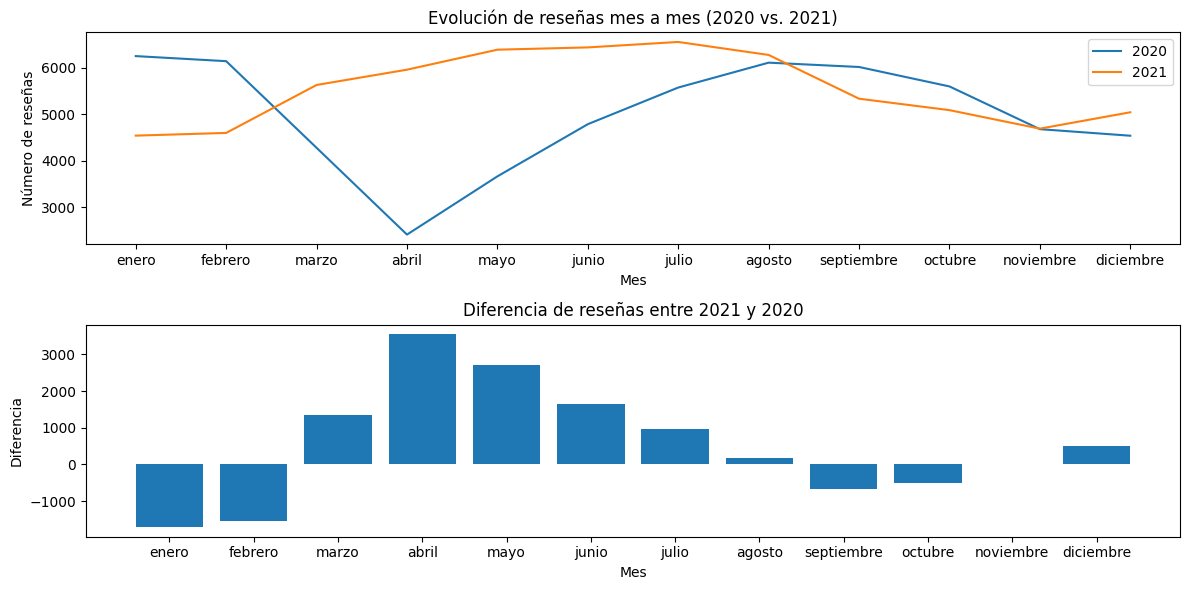

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el DataFrame desde el archivo CSV
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/ReseñasKFCMensual.csv")

# Crear un diccionario para mapear números de mes a nombres
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar el mapeo al DataFrame
df['mes'] = df['mes'].map(meses)

# Filtrar los datos por año 2020 y 2021
df_2020 = df[df['anio'] == 2020]
df_2021 = df[df['anio'] == 2021]

# Crear gráficos
plt.figure(figsize=(12, 6))

# Gráfico de evolución mes a mes para 2020 y 2021
plt.subplot(2, 1, 1)
plt.plot(df_2020['mes'], df_2020['Numero_reviews'], label='2020')
plt.plot(df_2021['mes'], df_2021['Numero_reviews'], label='2021')
plt.xlabel('Mes')
plt.ylabel('Número de reseñas')
plt.title('Evolución de reseñas mes a mes (2020 vs. 2021)')
plt.legend()

# Gráfico de diferencia mes a mes entre 2020 y 2021
plt.subplot(2, 1, 2)
plt.bar(df_2021['mes'], df_2021['Numero_reviews'] - df_2020['Numero_reviews'].values)
plt.xlabel('Mes')
plt.ylabel('Diferencia')
plt.title('Diferencia de reseñas entre 2021 y 2020')

plt.tight_layout()
plt.show()

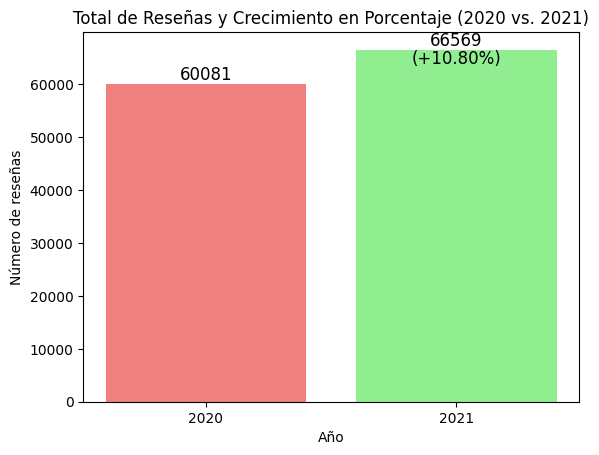

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el DataFrame desde el archivo CSV
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/ReseñasKFCMensual.csv")

# Filtrar los datos por año 2020 y 2021
df_2020 = df[df['anio'] == 2020]
df_2021 = df[df['anio'] == 2021]

# Calcular el total de reseñas para cada año
total_2020 = df_2020['Numero_reviews'].sum()
total_2021 = df_2021['Numero_reviews'].sum()

# Calcular el porcentaje de crecimiento
crecimiento_porcentaje = ((total_2021 - total_2020) / total_2020) * 100

# Personalizar colores
colors = ['lightcoral', 'lightgreen']

# Crear un gráfico de barras con colores personalizados
plt.bar(['2020', '2021'], [total_2020, total_2021], color=colors)
plt.xlabel('Año')
plt.ylabel('Número de reseñas')
plt.title('Total de Reseñas y Crecimiento en Porcentaje (2020 vs. 2021)')

# Mostrar el número de reseñas del total adentro de cada barra
for i, v in enumerate([total_2020, total_2021]):
    plt.text(i, v, f'{v}', ha='center', va='bottom', fontsize=12)

# Agregar el porcentaje de crecimiento
plt.text(1, total_2021, f'(+{crecimiento_porcentaje:.2f}%)', ha='center', va='top', fontsize=12)

plt.show()

# Trabajamos con los datos de la plataforma de reseñas GoogleMaps

In [9]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/GMaps/df_google_maps.csv")

df

,Usuario,Rating_Usuario,Review,gmap_id,Anio,Mes,Dia,Estado,Sentimiento,Categ_Sentimiento,Negocio,Direccion_Negocio,Calificacion_promedio,Categoria,Numero_reviews,Horario,Filtrado,Clasificacion Negocio
0,song ro,5,love there korean rice cake,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021,1,6,California,0.500000,Positivo,san soo dang,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","['korean', 'restaurant']",Restaurante
1,rafa robles,5,good very good,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2021,2,9,California,0.805000,Positivo,san soo dang,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","['korean', 'restaurant']",Restaurante
2,david han,4,they make korean traditional food very properly,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2020,3,8,California,0.000000,Neutral,san soo dang,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","['korean', 'restaurant']",Restaurante
3,anthony kim,5,short ribs are very delicious,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2019,3,7,California,0.500000,Positivo,san soo dang,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","['korean', 'restaurant']",Restaurante
4,mario marzouk,5,great food and prices the portions are large,0x80c2c778e3b73d33:0xbdc58662a4a97d49,2017,5,16,California,0.507143,Positivo,san soo dang,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[['Thursday', '6:30AM–6PM'], ['Friday', '6:30A...","['korean', 'restaurant']",Restaurante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5529865,zachary vincent,1,ended up with a headache because if the rides ...,0x88f51932d3a6b3ed:0xab77e62c633232c,2019,1,3,Georgia,0.000000,Neutral,the great american scream machine,"the great american scream machine, 275 riversi...",3.0,roller coaster tourist attraction,118,"[['Monday', 'Open 24 hours'], ['Tuesday', 'Ope...","['roller', 'coaster', 'tourist', 'attraction']",Otros
5529866,jeff marshall,1,love the wooden coasters this one will hurt you,0x88f51932d3a6b3ed:0xab77e62c633232c,2019,6,4,Georgia,0.250000,Positivo,the great american scream machine,"the great american scream machine, 275 riversi...",3.0,roller coaster tourist attraction,118,"[['Monday', 'Open 24 hours'], ['Tuesday', 'Ope...","['roller', 'coaster', 'tourist', 'attraction']",Otros
5529867,l s,4,this is still in operation first wooden coast...,0x88f51932d3a6b3ed:0xab77e62c633232c,2017,11,25,Georgia,0.100000,Positivo,the great american scream machine,"the great american scream machine, 275 riversi...",3.0,roller coaster tourist attraction,118,"[['Monday', 'Open 24 hours'], ['Tuesday', 'Ope...","['roller', 'coaster', 'tourist', 'attraction']",Otros
5529868,sidhant dewan,4,classic american ride makes me have headaches ...,0x88f51932d3a6b3ed:0xab77e62c633232c,2018,3,16,Georgia,0.155556,Positivo,the great american scream machine,"the great american scream machine, 275 riversi...",3.0,roller coaster tourist attraction,118,"[['Monday', 'Open 24 hours'], ['Tuesday', 'Ope...","['roller', 'coaster', 'tourist', 'attraction']",Otros


# Filtramos el DataFrame por nuestro cliente KFC. 

In [12]:
import pandas as pd

# Leer el archivo CSV en un DataFrame
df = pd.read_csv("C:/Users/Fede/Desktop/ETL/GMaps/df_google_maps.csv")

# Comprobar valores nulos en la columna 'Negocio'
print(df['Negocio'].isnull().sum())

# Lidiar con valores nulos (eliminar filas con valores nulos)
df.dropna(subset=['Negocio'], inplace=True)

# Filtrar las filas que contengan 'kfc' en la columna 'Negocio' (sin importar mayúsculas/minúsculas)
df_filtrado = df[df['Negocio'].str.contains('kfc', case=False)]

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("C:/Users/Fede/Desktop/ETL/3er_Demo/GmapsReseñasKFCMensual.csv", index=False)

# Imprimir el DataFrame resultante
df_filtrado

33


,Usuario,Rating_Usuario,Review,gmap_id,Anio,Mes,Dia,Estado,Sentimiento,Categ_Sentimiento,Negocio,Direccion_Negocio,Calificacion_promedio,Categoria,Numero_reviews,Horario,Filtrado,Clasificacion Negocio
62041,pao xiong,2,1st time there walk in busy hour there are mor...,0x809b53c7c44f3553:0x8aabb2837cc53e00,2021,8,17,California,-0.009375,Negativo,kfc,"kfc, 438 bridge st, yuba city, ca 95991",3.7,fast food restaurant,48,"[['Friday', '10AM–10PM'], ['Saturday', '10AM–1...","['fast', 'food', 'restaurant']",Restaurante
62042,snake eyes,2,this kfc is not the one your looking for they ...,0x809b53c7c44f3553:0x8aabb2837cc53e00,2021,8,24,California,0.150000,Positivo,kfc,"kfc, 438 bridge st, yuba city, ca 95991",3.7,fast food restaurant,48,"[['Friday', '10AM–10PM'], ['Saturday', '10AM–1...","['fast', 'food', 'restaurant']",Restaurante
62043,katherine hendrix,4,for being new to the community they were prett...,0x809b53c7c44f3553:0x8aabb2837cc53e00,2021,8,24,California,0.206061,Positivo,kfc,"kfc, 438 bridge st, yuba city, ca 95991",3.7,fast food restaurant,48,"[['Friday', '10AM–10PM'], ['Saturday', '10AM–1...","['fast', 'food', 'restaurant']",Restaurante
62044,rosa flores,5,the kitchen is awesome chicken sandwich nice a...,0x809b53c7c44f3553:0x8aabb2837cc53e00,2021,8,18,California,0.375000,Positivo,kfc,"kfc, 438 bridge st, yuba city, ca 95991",3.7,fast food restaurant,48,"[['Friday', '10AM–10PM'], ['Saturday', '10AM–1...","['fast', 'food', 'restaurant']",Restaurante
62045,shawn back spkroftheded,1,starting off on the wrong foot me and my wife ...,0x809b53c7c44f3553:0x8aabb2837cc53e00,2021,8,14,California,-0.001339,Negativo,kfc,"kfc, 438 bridge st, yuba city, ca 95991",3.7,fast food restaurant,48,"[['Friday', '10AM–10PM'], ['Saturday', '10AM–1...","['fast', 'food', 'restaurant']",Restaurante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5495436,pamela hornsby,5,u cant find any better chicken n thomaston we...,0x88f37e69e63e89fd:0xf4995049523a6849,2018,4,18,Georgia,-0.050000,Negativo,kfc,"kfc, 1051 highway 19, north st, thomaston, ga ...",3.9,chicken restaurant fast food restaurant,298,"[['Monday', '11AM–9:30PM'], ['Tuesday', '11AM–...","['chicken', 'restaurant', 'fast', 'food', 'res...",Restaurante
5495437,bajancanadians fan,4,quick service,0x88f37e69e63e89fd:0xf4995049523a6849,2018,6,9,Georgia,0.333333,Positivo,kfc,"kfc, 1051 highway 19, north st, thomaston, ga ...",3.9,chicken restaurant fast food restaurant,298,"[['Monday', '11AM–9:30PM'], ['Tuesday', '11AM–...","['chicken', 'restaurant', 'fast', 'food', 'res...",Restaurante
5495438,kevin devane,5,enjoyed a good meal,0x88f37e69e63e89fd:0xf4995049523a6849,2017,2,4,Georgia,0.600000,Positivo,kfc,"kfc, 1051 highway 19, north st, thomaston, ga ...",3.9,chicken restaurant fast food restaurant,298,"[['Monday', '11AM–9:30PM'], ['Tuesday', '11AM–...","['chicken', 'restaurant', 'fast', 'food', 'res...",Restaurante
5495439,jane burdette,5,always great service if you like chicken liver...,0x88f37e69e63e89fd:0xf4995049523a6849,2021,5,31,Georgia,0.107143,Positivo,kfc,"kfc, 1051 highway 19, north st, thomaston, ga ...",3.9,chicken restaurant fast food restaurant,298,"[['Monday', '11AM–9:30PM'], ['Tuesday', '11AM–...","['chicken', 'restaurant', 'fast', 'food', 'res...",Restaurante


# Sumamos la cantidad de reviews en la columna "Numero_reviews" y los meses y buscamos un conteo total de reviews por mes. 

In [14]:
# Asegurémonos de que las columnas "anio", "mes" y "dia" sean de tipo datetime
df_filtrado['fecha'] = pd.to_datetime(df_filtrado['Anio'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-' + df_filtrado['Dia'].astype(str), format='%Y-%m-%d')


# Filtrar por los años 2020 y 2021
df_filtered = df_filtrado[(df_filtrado['fecha'].dt.year == 2020) | (df_filtrado['fecha'].dt.year == 2021)]

# Realizar la agrupación por año y mes y calcular la suma de reviews
result = df_filtered.groupby(['Anio', 'Mes']).agg({'Numero_reviews': 'sum', 'fecha': 'count'}).reset_index()
result.rename(columns={'fecha': 'count'}, inplace=True)

# Imprimir el resultado
result

C:\Users\Fede\AppData\Local\Temp\ipykernel_4508\1731558291.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['fecha'] = pd.to_datetime(df_filtrado['Anio'].astype(str) + '-' + df_filtrado['Mes'].astype(str) + '-' + df_filtrado['Dia'].astype(str), format='%Y-%m-%d')


,Anio,Mes,Numero_reviews,count
0,2020,1,34115,102
1,2020,2,44221,117
2,2020,3,29079,87
3,2020,4,5718,16
4,2020,5,14855,39
5,2020,6,18041,48
6,2020,7,23953,67
7,2020,8,16070,44
8,2020,9,21155,55
9,2020,10,21516,69


# Graficamos la evolución de reseñas mes a mes para los años 2020 y 2021, así como también la diferencia mes a mes entre ambos años:

In [19]:
import pandas as pd

# Crear un diccionario para mapear números de mes a nombres
meses = {
    1: 'enero',
    2: 'febrero',
    3: 'marzo',
    4: 'abril',
    5: 'mayo',
    6: 'junio',
    7: 'julio',
    8: 'agosto',
    9: 'septiembre',
    10: 'octubre',
    11: 'noviembre',
    12: 'diciembre'
}

# Aplicar el mapeo al DataFrame
result['Mes'] = result['Mes'].map(meses)

# Filtrar los datos por año 2020 y 2021
df_2020 = result[result['Anio'] == 2020]
df_2021 = result[result['Anio'] == 2021]

# Calcular la diferencia mes a mes entre 2020 y 2021
df_diff = df_2021.copy()
df_diff['Numero_reviews'] = df_2021['Numero_reviews'] - df_2020['Numero_reviews'].fillna(0)

# Calcular el total de reseñas para cada año
total_2020 = df_2020['Numero_reviews'].sum()
total_2021 = df_2021['Numero_reviews'].sum()

# Imprimir los DataFrames resultantes y los totales
print("DataFrame para 2020:")
print(df_2020)

print("\nDataFrame para 2021:")
print(df_2021)

print("\nDiferencia mes a mes entre 2020 y 2021:")
print(df_diff)

print("\nTotal de reseñas en 2020:", total_2020)
print("Total de reseñas en 2021:", total_2021)

DataFrame para 2020:
    Anio  Mes  Numero_reviews  count
0   2020  NaN           34115    102
1   2020  NaN           44221    117
2   2020  NaN           29079     87
3   2020  NaN            5718     16
4   2020  NaN           14855     39
5   2020  NaN           18041     48
6   2020  NaN           23953     67
7   2020  NaN           16070     44
8   2020  NaN           21155     55
9   2020  NaN           21516     69
10  2020  NaN           22906     65
11  2020  NaN           16566     48

DataFrame para 2021:
    Anio  Mes  Numero_reviews  count
12  2021  NaN           21041     56
13  2021  NaN           21278     65
14  2021  NaN           34714     97
15  2021  NaN           36113     99
16  2021  NaN           24297     77
17  2021  NaN            9446     28
18  2021  NaN              66      2
19  2021  NaN             624     13

Diferencia mes a mes entre 2020 y 2021:
    Anio  Mes  Numero_reviews  count
12  2021  NaN             NaN     56
13  2021  NaN             Na